In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "tvae"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.015362,-0.044642,-0.017815,-0.039244,0.011219,0.028928,-0.028857,-0.001186,0.026692,-0.016502,85.0
1,-0.014481,-0.044642,0.034783,-0.037870,-0.022101,-0.017344,0.011113,0.003065,-0.041925,0.010199,105.0
2,-0.006247,-0.044642,0.110899,0.002999,0.024244,0.028996,-0.016362,-0.001012,-0.036209,0.049812,269.0
3,0.007976,-0.044642,-0.008130,-0.051826,-0.040345,-0.017789,-0.032741,-0.045439,0.025899,0.005592,112.0
4,0.036320,-0.044642,0.037089,-0.001561,0.143798,0.032147,0.013749,0.028945,0.062610,-0.012406,209.0
5,-0.007829,0.050680,0.019269,0.048249,0.009651,0.005218,-0.037276,0.017235,0.028243,-0.010487,227.0
6,0.048255,-0.044642,0.006777,-0.040237,0.071038,0.001528,-0.017964,-0.048076,-0.038460,0.008381,109.0
7,-0.027997,0.050680,0.036235,0.043557,0.005134,0.020367,-0.074008,0.093190,0.023381,-0.006499,279.0
8,0.040294,0.050680,-0.028501,0.008473,0.042084,0.025046,-0.011505,-0.000376,0.041917,0.008584,231.0
9,0.037928,0.050680,0.086509,0.035145,0.028119,-0.043806,0.004574,0.063695,0.067871,0.032404,214.0


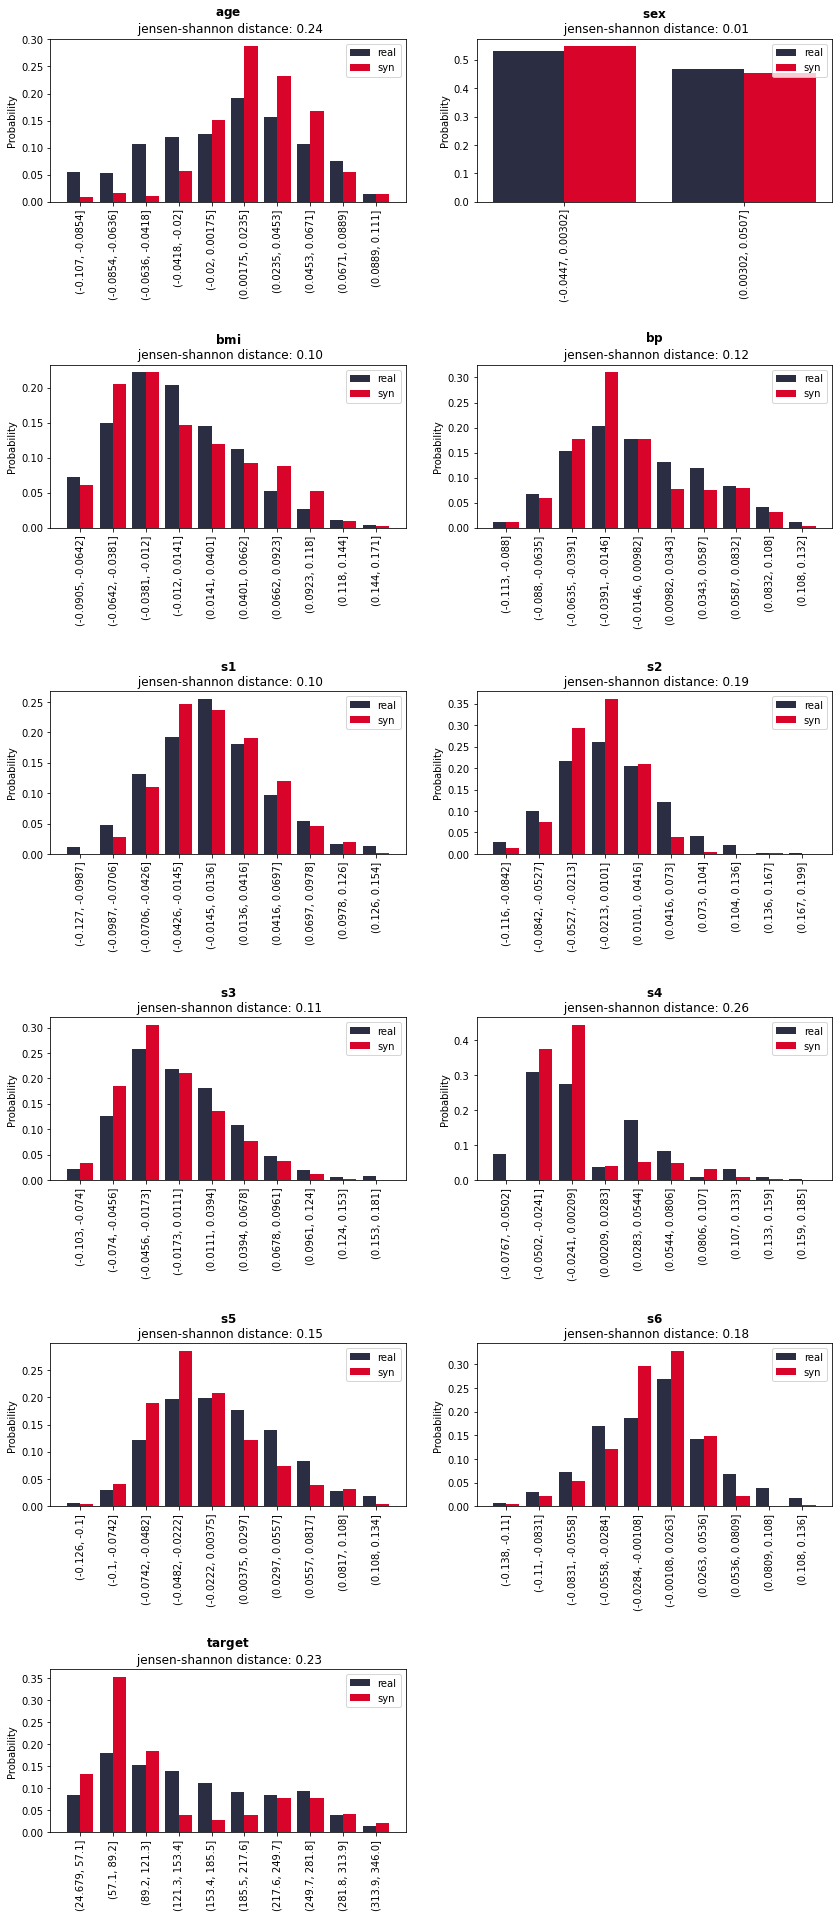

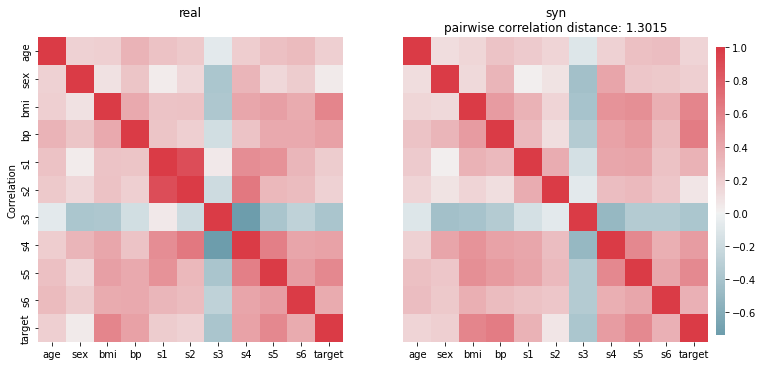

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : tvae


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.0758,0.10741,0.088504,0.013629,0.082303,0.015805,3,0,0.02
sanity.inlier_probability,0.825792,0.923077,0.877074,0.039891,0.882353,0.048643,3,0,0.02
sanity.outlier_probability,0.002262,0.013575,0.006033,0.005333,0.002262,0.005656,3,0,0.01
statistical.inverse_kl_divergence,0.727071,0.821052,0.774394,0.038371,0.77506,0.046991,3,0,0.01
statistical.kolmogorov_smirnov_test,0.812217,0.836281,0.823598,0.009867,0.822295,0.012032,3,0,0.01
statistical.chi_squared_test,0.438711,0.633976,0.533238,0.079837,0.527027,0.097632,3,0,0.03
statistical.maximum_mean_discrepancy,0.005464,0.007191,0.006211,0.000724,0.005978,0.000863,3,0,0.04
statistical.inverse_cdf_distance,1.650282,1.860552,1.736485,0.089921,1.698621,0.105135,3,0,8.6



[23:00:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
